1.1-1.3

In [7]:
import sys
!pip install pyomo
import pyomo
import scipy

if "google.colab" in sys.modules:
    !wget "https://raw.githubusercontent.com/ndcbe/optimization/main/notebooks/helper.py"
    import helper
    helper.easy_install()
else:
    sys.path.insert(0, '../')
    import helper
helper.set_plotting_style()



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 90.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 4.8 MB/s eta 0:00:00
--2024-09-30 13:40:07--  https://raw.githubusercontent.com/ndcbe/optimization/main/notebooks/helper.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6493 (6.3K) [text/plain]
Saving to: ‘helper.py’

helper.py           100%[===================>]   6.34K  --.-KB/s    in 0s      

2024-09-30 13:40:07 (76.1 MB/s) - ‘helper.py’ saved [6493/6493]

Installing idaes via pip...
idaes was successfully installed
idaes, version 2.5.0


Running idaes get-extensions to install Ipopt, k_aug, and more...
Checking solver versions:
Ipopt 3.13.2 (x86_64-pc-linux-gnu), ASL(20190605)



[K_AUG] 0.1.0, Part of the IDAES PSE

In [9]:
# First Example
import pyomo.environ as pyo

# Create instance of concrete Pyomo model.
# concrete means all of the sets and model data are specified at the time of model construction.
# In this class, you'll use a concrete model.
m = pyo.ConcreteModel()

## Declare variables with initial values with bounds
m.x1 = pyo.Var(initialize=1, bounds=(-10, 10))
m.x2 = pyo.Var(initialize=1, bounds=(-10, 10))
m.x3 = pyo.Var(initialize=1, bounds=(-10, 10))

## Declare objective
m.OBJ = pyo.Objective(expr=m.x1**2 + 2*m.x2**2 - m.x3, sense = pyo.minimize)

## Declare equality constraints
m.h1 = pyo.Constraint(expr= m.x1 + m.x2 == 1)
m.h2 = pyo.Constraint(expr= m.x1 + 2*m.x2 - m.x3 == 5) # EDITS HERE

## Display model
m.pprint()

3 Var Declarations
    x1 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :   -10 :     1 :    10 : False : False :  Reals
    x2 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :   -10 :     1 :    10 : False : False :  Reals
    x3 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :   -10 :     1 :    10 : False : False :  Reals

1 Objective Declarations
    OBJ : Size=1, Index=None, Active=True
        Key  : Active : Sense    : Expression
        None :   True : minimize : x1**2 + 2*x2**2 - x3

2 Constraint Declarations
    h1 : Size=1, Index=None, Active=True
        Key  : Lower : Body    : Upper : Active
        None :   1.0 : x1 + x2 :   1.0 :   True
    h2 : Size=1, Index=None, Active=True
        Key  : Lower : Body           : Upper : Active
        None :   5.0 : x1 + 2*x2 - x3 :   5.0 :   True

6 Declarations: x1 x2 x3 OBJ h1 h2


In [10]:
opt1 = pyo.SolverFactory('ipopt')
status1 = opt1.solve(m, tee=True)

Ipopt 3.13.2: 

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt

This version of Ipopt was compiled from source code available at
    https://github.com/IDAES/Ipopt as part of the Institute for the Design of
    Advanced Energy Systems Process Systems Engineering Framework (IDAES PSE
    Framework) Copyright (c) 2018-2019. See https://github.com/IDAES/idaes-pse.

This version of Ipopt was compiled using HSL, a collection of Fortran codes
    for large-scale scientific computation.  All technical papers, sales and
    publicity material resulting from use of the HSL codes within IPOPT must
    contain the following acknowledgement:
        HSL, a collection of Fortran codes for large-scale scientific
        computation. See http://

In [11]:
## Return the solution
print("x1 = ",pyo.value(m.x1))
print("x2 = ",pyo.value(m.x2))
print("x3 = ",pyo.value(m.x3))
print("\n")

x1 =  0.4999999999666826
x2 =  0.5000000000333175
x3 =  -3.499999999966682




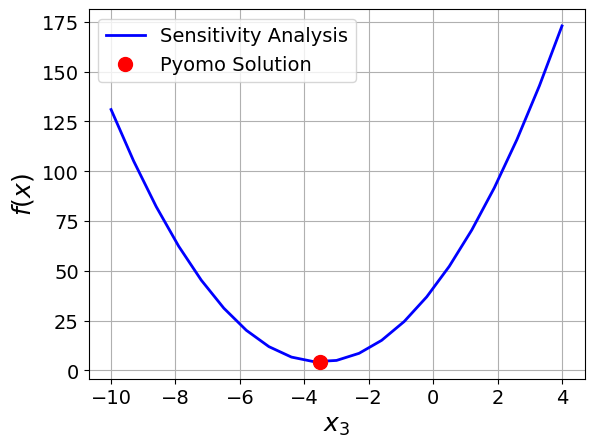

In [12]:
import numpy as np
import matplotlib.pyplot as plt

def constraints(x3):
    ''' Solve the linear constraints

    Args:
        x3: Value for the decision variable x3

    Returns:
        x1 and x2: Values calculated from the constraints
    '''

    # Define the matrices in the above equations
    A = np.array([[1, 1],[1, 2]])
    b = np.array([1, 5+x3])

    # Solve the linear system of equations
    z = np.linalg.solve(A,b)
    x1 = z[0]
    x2 = z[1]
    return x1, x2

# Define a lambda function to plot the objective
objective = lambda x1, x2, x3: x1**2 + 2*x2**2 - x3

# Guess many values of x3.
x3_guesses = np.linspace(-10,4,21)
obj = []
for x3 in x3_guesses:
    # Solve the constraints to determine x1 and x2
    x1, x2 = constraints(x3)
    # Calculate the store the objective function value
    obj.append(objective(x1,x2,x3))

# Plot the objective function value versus x3
plt.plot(x3_guesses, obj,color='blue',linewidth=2,label="Sensitivity Analysis")
plt.xlabel("$x_3$",fontsize=18)
plt.ylabel("$f(x)$",fontsize=18)

# Plot the solution from Pyomo
x3_sln = pyo.value(m.x3)
obj_sln = pyo.value(m.OBJ)
plt.plot(x3_sln, obj_sln,marker='o',color='red',markersize=10,label="Pyomo Solution",linestyle='')
plt.legend()
plt.grid(True)
plt.show()

Optimal solution:
x1 =  0.4999999566003748
x2 =  0.5000000433996252
x3 =  -3.4999999566003748
Objective value =  4.250000000000005


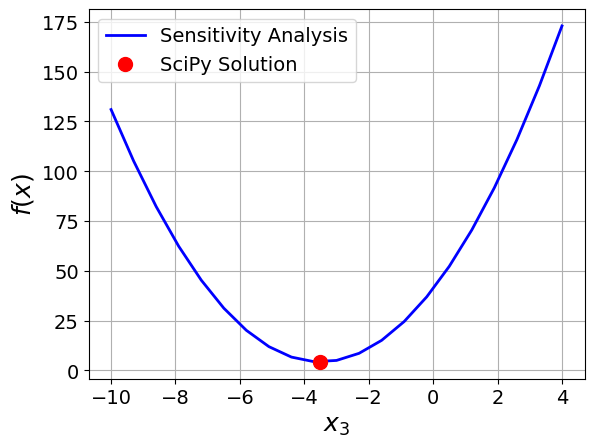

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Function to solve the linear constraints
def constraints(x3):
    ''' Solve the linear constraints

    Args:
        x3: Value for the decision variable x3 (array from SciPy)

    Returns:
        x1 and x2: Values calculated from the constraints
    '''
    # x3 is passed as an array, extract the scalar value
    x3 = x3[0]

    # Define the matrices in the linear constraints
    A = np.array([[1, 1], [1, 2]])
    b = np.array([1, 5 + x3])

    # Solve the linear system of equations
    z = np.linalg.solve(A, b)
    x1 = z[0]
    x2 = z[1]
    return x1, x2

# Objective function
def objective(x3):
    ''' Objective function to minimize f(x) = x1^2 + 2*x2^2 - x3

    Args:
        x3: Value of the decision variable x3 (array from SciPy)

    Returns:
        Objective function value
    '''
    x1, x2 = constraints(x3)
    return x1**2 + 2*x2**2 - x3[0]  # Extract scalar from x3 array

# Perform the optimization using SciPy's minimize function
result = minimize(objective, x0=[1], bounds=[(-10, 10)])

# Display the result
x3_opt = result.x[0]
x1_opt, x2_opt = constraints([x3_opt])

print("Optimal solution:")
print("x1 = ", x1_opt)
print("x2 = ", x2_opt)
print("x3 = ", x3_opt)
print("Objective value = ", result.fun)

# Sensitivity analysis: Guess many values of x3
x3_guesses = np.linspace(-10, 4, 21)
obj_values = []
for x3 in x3_guesses:
    # Solve the constraints to determine x1 and x2
    x1, x2 = constraints([x3])
    # Calculate and store the objective function value
    obj_values.append(objective([x3]))

# Plot the objective function value versus x3
plt.plot(x3_guesses, obj_values, color='blue', linewidth=2, label="Sensitivity Analysis")
plt.xlabel("$x_3$", fontsize=18)
plt.ylabel("$f(x)$", fontsize=18)

# Plot the solution from SciPy
plt.plot(x3_opt, result.fun, marker='o', color='red', markersize=10, label="SciPy Solution", linestyle='')
plt.legend()
plt.grid(True)
plt.show()


1.4

In [14]:
# This code cell installs packages on Colab

import sys
if "google.colab" in sys.modules:
    !wget "https://raw.githubusercontent.com/ndcbe/optimization/main/notebooks/helper.py"
    import helper
    helper.easy_install()
else:
    sys.path.insert(0, '../')
    import helper
helper.set_plotting_style()

import pandas as pd
import pyomo.environ as pyo

--2024-09-30 13:40:40--  https://raw.githubusercontent.com/ndcbe/optimization/main/notebooks/helper.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6493 (6.3K) [text/plain]
Saving to: ‘helper.py.1’

helper.py.1         100%[===================>]   6.34K  --.-KB/s    in 0s      

2024-09-30 13:40:40 (50.8 MB/s) - ‘helper.py.1’ saved [6493/6493]

idaes was found! No need to install.


In [15]:
# Load data from file, use the first column (0, recall Python starts counting at 0) as the index
food_options = pd.read_csv('https://raw.githubusercontent.com/ndcbe/optimization/main/notebooks/data/student_diet.csv',index_col=0)

# Print up the the first 10 rows of data
food_options.head(10)

,P,C,F,V,price
takeaway,3.0,3,2,1,5
vegtables,1.0,2,0,4,1
bread,0.5,4,1,0,2


In [16]:
'''
You want to save money eating while remaining healthy. A healthy diet requires at least P=6 units of protein,
C=15 units of carbohydrates, F=5 units of fats and V=7 units of vitamins. Due to compounding factors (blizzard
during Lent), our campus only has these options:
'''

import pyomo.environ as pyo

# Create a Pyomo model
model = pyo.ConcreteModel()

# Define sets (for the food items)
foods = ['takeaway', 'vegetables', 'bread']

# Nutrient data for each food item (P, C, F, V, price)
nutrient_data = {
    'P': {'takeaway': 3.0, 'vegetables': 1.0, 'bread': 0.5},
    'C': {'takeaway': 3.0, 'vegetables': 2.0, 'bread': 4.0},
    'F': {'takeaway': 2.0, 'vegetables': 0.0, 'bread': 1.0},
    'V': {'takeaway': 1.0, 'vegetables': 4.0, 'bread': 0.0},
    'price': {'takeaway': 5, 'vegetables': 1, 'bread': 2}
}

# Nutrient requirements
nutrient_requirements = {'P': 6, 'C': 15, 'F': 5, 'V': 7}

# Declare decision variables (amount of each food item)
model.x = pyo.Var(foods, domain=pyo.NonNegativeReals)

# Objective function: Minimize the total cost
model.OBJ = pyo.Objective(expr=sum(nutrient_data['price'][f] * model.x[f] for f in foods), sense=pyo.minimize)

# Constraints: Meet the nutrient requirements for protein (P), carbohydrates (C), fats (F), and vitamins (V)
model.protein_constraint = pyo.Constraint(expr=sum(nutrient_data['P'][f] * model.x[f] for f in foods) >= nutrient_requirements['P'])
model.carb_constraint = pyo.Constraint(expr=sum(nutrient_data['C'][f] * model.x[f] for f in foods) >= nutrient_requirements['C'])
model.fat_constraint = pyo.Constraint(expr=sum(nutrient_data['F'][f] * model.x[f] for f in foods) >= nutrient_requirements['F'])
model.vitamin_constraint = pyo.Constraint(expr=sum(nutrient_data['V'][f] * model.x[f] for f in foods) >= nutrient_requirements['V'])

# Solve the model using 'ipopt' solver
opt1 = pyo.SolverFactory('ipopt')
status1 = opt1.solve(model, tee=True)

# Display the solution
print("Optimal solution found:")
for f in foods:
    print(f"{f}: {model.x[f].value:.2f} units")

print(f"Total cost: {pyo.value(model.OBJ):.2f}")

Ipopt 3.13.2: 

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt

This version of Ipopt was compiled from source code available at
    https://github.com/IDAES/Ipopt as part of the Institute for the Design of
    Advanced Energy Systems Process Systems Engineering Framework (IDAES PSE
    Framework) Copyright (c) 2018-2019. See https://github.com/IDAES/idaes-pse.

This version of Ipopt was compiled using HSL, a collection of Fortran codes
    for large-scale scientific computation.  All technical papers, sales and
    publicity material resulting from use of the HSL codes within IPOPT must
    contain the following acknowledgement:
        HSL, a collection of Fortran codes for large-scale scientific
        computation. See http://

In [17]:
# Checking with answer from module

import pyomo.environ as pyo

# Assuming 'food_options' is a DataFrame with food nutrient information and price
# You would extract the column names and set up the parameters as you've shown
# Example data for clarity
import pandas as pd
food_options = pd.DataFrame({
    'P': [3.0, 1.0, 0.5],
    'C': [3.0, 2.0, 4.0],
    'F': [2.0, 0.0, 1.0],
    'V': [1.0, 4.0, 0.0],
    'price': [5, 1, 2]
}, index=['takeaway', 'vegetables', 'bread'])

# Nutrient requirements
nutrient_requirements = {'P': 6, 'C': 15, 'F': 5, 'V': 7}

# Extract the column names, convert to a list
nutrients = food_options.columns.to_list()[0:4]  # ['P', 'C', 'F', 'V']

# Extract the index names (food items), convert to a list
foods = food_options.index.to_list()  # ['takeaway', 'vegetables', 'bread']

# Create a dictionary with nutrient content for each food (excluding price)
food_info = food_options[nutrients].stack().to_dict()

# Create dictionary for prices
price = food_options['price'].to_dict()

# Define the model
m = pyo.ConcreteModel()

## Define sets
m.FOOD = pyo.Set(initialize=foods)
m.NUTRIENTS = pyo.Set(initialize=nutrients)

## Define parameters
m.needs = pyo.Param(m.NUTRIENTS, initialize=nutrient_requirements)
m.food_info = pyo.Param(m.FOOD, m.NUTRIENTS, initialize=food_info)
m.price = pyo.Param(m.FOOD, initialize=price)

## Define variables
m.food_eaten = pyo.Var(m.FOOD, initialize=1.0, domain=pyo.NonNegativeReals)

## Define constraints
def diet_min_rule(m, n):
    return sum(m.food_info[f, n] * m.food_eaten[f] for f in m.FOOD) >= m.needs[n]

m.diet_min = pyo.Constraint(m.NUTRIENTS, rule=diet_min_rule)

## Define objective
m.cost = pyo.Objective(expr=sum(m.food_eaten[f] * m.price[f] for f in m.FOOD), sense=pyo.minimize)

# Print model (optional)
m.pprint()

# Specify the solver
solver = pyo.SolverFactory('ipopt')

# Solve the model
results = solver.solve(m, tee=True)

# Extract the solution (amount of each food eaten)
print("Optimal solution found:")
for f in m.FOOD:
    print(f"Units of {f} eaten = {pyo.value(m.food_eaten[f]):.10f}")

# Print the total cost
print(f"Total cost: {pyo.value(m.cost):.2f}")


2 Set Declarations
    FOOD : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :    3 : {'takeaway', 'vegetables', 'bread'}
    NUTRIENTS : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :    4 : {'P', 'C', 'F', 'V'}

3 Param Declarations
    food_info : Size=12, Index=FOOD*NUTRIENTS, Domain=Any, Default=None, Mutable=False
        Key                 : Value
             ('bread', 'C') :   4.0
             ('bread', 'F') :   1.0
             ('bread', 'P') :   0.5
             ('bread', 'V') :   0.0
          ('takeaway', 'C') :   3.0
          ('takeaway', 'F') :   2.0
          ('takeaway', 'P') :   3.0
          ('takeaway', 'V') :   1.0
        ('vegetables', 'C') :   2.0
        ('vegetables', 'F') :   0.0
        ('vegetables', 'P') :   1.0
        ('vegetables', 'V') :   4.0
    needs : Size=4, Index=NUTRIENTS, Domain=Any, Default=None, Mutable=F

1.4.2

In [31]:
import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

def create_circle_model(circle_radii):
    ''' Create circle optimization model in Pyomo

    Arguments:
        circle_radii: dictionary with keys=circle name and value=radius (float)

    Returns:
        model: Pyomo model
    '''

    # Create a concrete Pyomo model.
    model = pyo.ConcreteModel()

    # Initialize index for circles
    model.CIRCLES = pyo.Set(initialize = circle_radii.keys())

    # Create parameter
    model.R = pyo.Param(model.CIRCLES, domain=pyo.PositiveReals, initialize=circle_radii)

    # Create variables for box dimensions
    model.a = pyo.Var(domain=pyo.PositiveReals, initialize=25)  # Height of the box
    model.b = pyo.Var(domain=pyo.PositiveReals, initialize=25)  # Width of the box

    # Set objective: minimize the perimeter of the box
    model.obj = pyo.Objective(expr=2*(model.a + model.b), sense=pyo.minimize)

    # Create variables for circle centers
    model.x = pyo.Var(model.CIRCLES, domain=pyo.PositiveReals)  # x-coordinate of circle center
    model.y = pyo.Var(model.CIRCLES, domain=pyo.PositiveReals)  # y-coordinate of circle center

    # "In the box" constraints (ensuring the circles are inside the box)
    def left_x(m, c):
        return m.x[c] >= model.R[c]  # Left side of the box
    model.left_x_con = pyo.Constraint(model.CIRCLES, rule=left_x)

    def left_y(m, c):
        return m.y[c] >= model.R[c]  # Bottom of the box
    model.left_y_con = pyo.Constraint(model.CIRCLES, rule=left_y)

    def right_x(m, c):
        return m.x[c] <= m.b - model.R[c]  # Right side of the box (uses width `b`)
    model.right_x_con = pyo.Constraint(model.CIRCLES, rule=right_x)

    def right_y(m, c):
        return m.y[c] <= m.a - model.R[c]  # Top of the box (uses height `a`)
    model.right_y_con = pyo.Constraint(model.CIRCLES, rule=right_y)

    # Define the set of pairs (c1, c2) where c1 < c2
    model.circle_pairs = pyo.Set(initialize=[(c1, c2) for c1 in circle_radii for c2 in circle_radii if c1 < c2])

    # No overlap constraints (ensuring the circles don't overlap)
    def no_overlap(m, c1, c2):
        return (m.x[c1] - m.x[c2])**2 + (m.y[c1] - m.y[c2])**2 >= (model.R[c1] + model.R[c2])**2
    model.no_overlap_con = pyo.Constraint(model.circle_pairs, rule=no_overlap)

    return model

def initialize_circle_model(model, a_init=25, b_init=25):
    ''' Initialize the x and y coordinates using uniform distribution

    Arguments:
        a_init: initial value for a (default=25)
        b_init: initial value for b (default=25)

    Returns:
        Nothing. But per Pyomo scoping rules, the input argument `model`
        can be modified in this function.

    '''
    # Initialize
    #model.a = 25
    #model.b = 25

    for i in model.CIRCLES:
        # Adding circle radii ensures the remains in the >0, >0 quadrant
        model.x[i] = random.uniform(0,10) + model.R[i]
        model.y[i] = random.uniform(0,10) + model.R[i]

# Create dictionary with circle data
circle_data = {'A': 10.0, 'B': 5.0, 'C': 3.0}

# Create model
model = create_circle_model(circle_data)
initialize_circle_model(model)

# Print model to check initialization
model.pprint()

# Specify the solver
solver = pyo.SolverFactory('ipopt')
results = solver.solve(model, tee=True)

# Print final results
for c in model.CIRCLES:
    print(f"x[{c}] = {pyo.value(model.x[c])}, y[{c}] = {pyo.value(model.y[c])}")

print(f"a = {pyo.value(model.a)}, b = {pyo.value(model.b)}")


2 Set Declarations
    CIRCLES : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :    3 : {'A', 'B', 'C'}
    circle_pairs : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     2 :    Any :    3 : {('A', 'B'), ('A', 'C'), ('B', 'C')}

1 Param Declarations
    R : Size=3, Index=CIRCLES, Domain=PositiveReals, Default=None, Mutable=False
        Key : Value
          A :  10.0
          B :   5.0
          C :   3.0

4 Var Declarations
    a : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :    25 :  None : False : False : PositiveReals
    b : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :    25 :  None : False : False : PositiveReals
    x : Size=3, Index=CIRCLES
        Key : Lower : Value              : Upper : Fixed : Stale : Domain
          A :     0 :  1

In [32]:
# Initialize model
initialize_circle_model(model)
model.pprint()

2 Set Declarations
    CIRCLES : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :    3 : {'A', 'B', 'C'}
    circle_pairs : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     2 :    Any :    3 : {('A', 'B'), ('A', 'C'), ('B', 'C')}

1 Param Declarations
    R : Size=3, Index=CIRCLES, Domain=PositiveReals, Default=None, Mutable=False
        Key : Value
          A :  10.0
          B :   5.0
          C :   3.0

4 Var Declarations
    a : Size=1, Index=None
        Key  : Lower : Value             : Upper : Fixed : Stale : Domain
        None :     0 : 19.99999980318954 :  None : False :  True : PositiveReals
    b : Size=1, Index=None
        Key  : Lower : Value              : Upper : Fixed : Stale : Domain
        None :     0 : 29.142135416184697 :  None : False :  True : PositiveReals
    x : Size=3, Index=CIRCLES
        Key : Lower : Value              : Upper

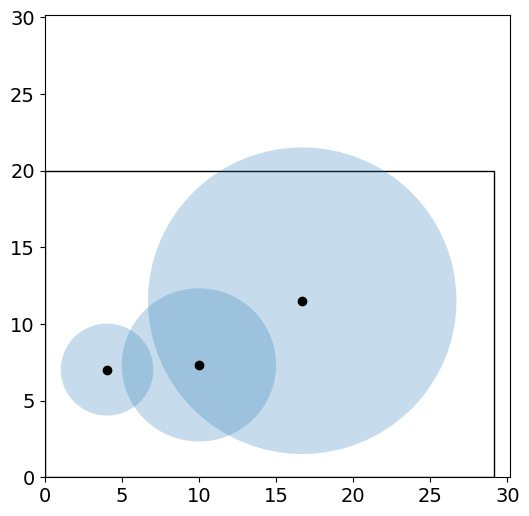

In [33]:
# Plot initial point

def plot_circles(m):
    ''' Plot circles using data in Pyomo model

    Arguments:
        m: Pyomo concrete model

    Returns:
        Nothing (but makes a figure)

    '''

    # Create figure
    fig, ax = plt.subplots(1,figsize=(6,6))

    # Adjust axes
    l = max(m.a.value,m.b.value) + 1
    ax.set_xlim(0,l)
    ax.set_ylim(0,l)

    # Draw box
    art = mpatches.Rectangle((0,0), width=m.b.value, height=m.a.value,fill=False)
    ax.add_patch(art)

    # Draw circles and mark center
    for i in m.CIRCLES:
        art2 = mpatches.Circle( (m.x[i].value,m.y[i].value), radius=m.R[i],fill=True,alpha=0.25)
        ax.add_patch(art2)

        plt.scatter(m.x[i].value,m.y[i].value,color='black')

    # Show plot
    plt.show()

plot_circles(model)

Ipopt 3.13.2: 

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt

This version of Ipopt was compiled from source code available at
    https://github.com/IDAES/Ipopt as part of the Institute for the Design of
    Advanced Energy Systems Process Systems Engineering Framework (IDAES PSE
    Framework) Copyright (c) 2018-2019. See https://github.com/IDAES/idaes-pse.

This version of Ipopt was compiled using HSL, a collection of Fortran codes
    for large-scale scientific computation.  All technical papers, sales and
    publicity material resulting from use of the HSL codes within IPOPT must
    contain the following acknowledgement:
        HSL, a collection of Fortran codes for large-scale scientific
        computation. See http://

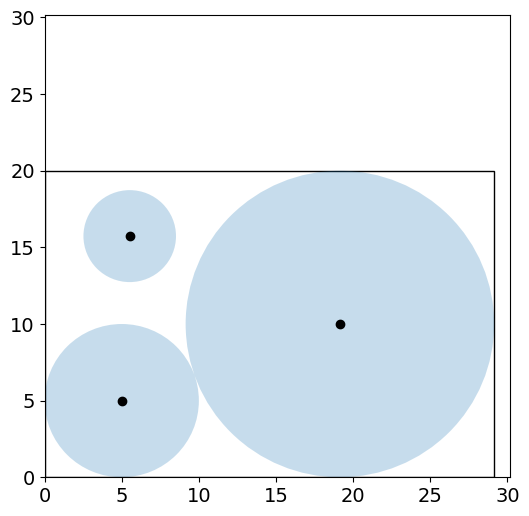

In [34]:
# Specify the solver
solver = pyo.SolverFactory('ipopt')

# Solve the model
results = solver.solve(model, tee = True)

# Print variable values
print("Name\tValue")
for c in model.component_data_objects(pyo.Var):
    print(c.name,"\t", pyo.value(c))

# Plot solution
plot_circles(model)

Desired Results

Name	Value
a 	 29.142135416184022
b 	 19.999999803189596
x[A] 	 9.99999990193744
x[B] 	 4.999999953543134
x[C] 	 15.734240379810942
y[A] 	 19.142135514931187
y[B] 	 4.999999951252124
y[C] 	 5.517021178044304


1.4.3. Take Away Messages

Linear programs are convex. We will learn this means all local optima are global optima.
Nonlinear programs may be nonconvex. For nonconvex problems, there often existings many local optima that are not also global optima.
We will learn how to mathematically define convexity and analyze this property.
Initialization is really important in optimization problems with nonlinear objectives or constraints!
There are specialize solves for linear programs, quadratic programs, and convex programs. In this class, we will focus on more general algorithms for (non)convex nonlinear programs including the algorithms used by the ipopt solver.

1.5

In [35]:
# This code cell installs packages on Colab

import sys
if "google.colab" in sys.modules:
    !wget "https://raw.githubusercontent.com/ndcbe/optimization/main/notebooks/helper.py"
    import helper
    helper.easy_install()
else:
    sys.path.insert(0, '../')
    import helper
helper.set_plotting_style()

--2024-09-30 14:01:19--  https://raw.githubusercontent.com/ndcbe/optimization/main/notebooks/helper.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6493 (6.3K) [text/plain]
Saving to: ‘helper.py.2’

helper.py.2         100%[===================>]   6.34K  --.-KB/s    in 0s      

2024-09-30 14:01:19 (66.3 MB/s) - ‘helper.py.2’ saved [6493/6493]

idaes was found! No need to install.


In [37]:
import pyomo.environ as pyo

nlp = pyo.ConcreteModel()

## Define sets
nlp.REACTORS = pyo.Set(initialize=range(1,3))

## Define parameters (data)

# $ / hr
cost_coefficient = {1:5.5, 2:4.0}
nlp.reactor_cost = pyo.Param(nlp.REACTORS, initialize=cost_coefficient)

# kmol/hr B
nlp.product_flowrate = pyo.Param(initialize=10.0)

# conversion fraction
reactor_conversion = {1:0.8, 2:0.67}
nlp.conversion = pyo.Param(nlp.REACTORS, initialize=reactor_conversion)

# feed cost, $/kmol of A
nlp.feed_cost = pyo.Param(initialize=5.0)


## Define variables

# Feed flowrate into reactor, x0 in handout illustration
nlp.feed_flowrate = pyo.Var(domain=pyo.NonNegativeReals)

# Reactor feed, x1 and x2 in handout illustration
nlp.reactor_feed = pyo.Var(nlp.REACTORS, domain=pyo.NonNegativeReals)

# Reactor effluent (outlet), z1 and z2 in handout illustration
nlp.reactor_effluent = pyo.Var(nlp.REACTORS, domain=pyo.NonNegativeReals)

## Define constraints

# Add your solution here
# mass balance over splitter
nlp.inlet_split = pyo.Constraint(expr=nlp.feed_flowrate == sum(nlp.reactor_feed[r] for r in nlp.REACTORS))

# reactor conversion
def rule_reactor(m, r):
    return m.reactor_effluent[r] == m.conversion[r] * m.reactor_feed[r]
nlp.reactor_performance = pyo.Constraint(nlp.REACTORS, rule=rule_reactor)

# mass balance over mixer meets product requirements
nlp.mixer = pyo.Constraint(expr=nlp.product_flowrate == sum(nlp.reactor_effluent[r] for r in nlp.REACTORS))

## Define objective
nlp.cost = pyo.Objective(expr=sum(nlp.reactor_cost[r] * (nlp.reactor_feed[r])**(0.6) for r in nlp.REACTORS) +
                        nlp.feed_cost * nlp.feed_flowrate)

nlp.pprint()

1 Set Declarations
    REACTORS : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :    2 : {1, 2}

4 Param Declarations
    conversion : Size=2, Index=REACTORS, Domain=Any, Default=None, Mutable=False
        Key : Value
          1 :   0.8
          2 :  0.67
    feed_cost : Size=1, Index=None, Domain=Any, Default=None, Mutable=False
        Key  : Value
        None :   5.0
    product_flowrate : Size=1, Index=None, Domain=Any, Default=None, Mutable=False
        Key  : Value
        None :  10.0
    reactor_cost : Size=2, Index=REACTORS, Domain=Any, Default=None, Mutable=False
        Key : Value
          1 :   5.5
          2 :   4.0

3 Var Declarations
    feed_flowrate : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  None :  None : False :  True : NonNegativeReals
    reactor_effluent : Size=2, Index=REACTORS
        Key : Lower : Value : Upper : Fixed : S

In [40]:
def initialize(model, reactor_choice=1):
    ''' Initialize all of the variables in the model to demonstrate local solutions

    Arguments:
        model: Pyomo model
        reactor_choice: 1 or 2

    Returns:
        nothing

    Action:
        initializes model

    '''

    # Guess 20 kmol/hr feed of A
    model.feed_flowrate = 20.0

    # Either assign all of the feed to reactor 1 or 2
    if reactor_choice == 1:
        model.reactor_feed[1] = 20.0
        model.reactor_feed[2] = 0
    elif reactor_choice == 2:
        model.reactor_feed[1] = 0
        model.reactor_feed[2] = 20.0
    else:
        raise ValueError("Argument reactor_choice needs value 1 or 2.")

    # Based on the feed assignments, calculate effluent flowrate
    for r in model.REACTORS:
        model.reactor_effluent[r] = model.reactor_feed[r]() * model.conversion[r]

initialize(nlp, reactor_choice=1)
nlp.pprint()


1 Set Declarations
    REACTORS : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :    2 : {1, 2}

4 Param Declarations
    conversion : Size=2, Index=REACTORS, Domain=Any, Default=None, Mutable=False
        Key : Value
          1 :   0.8
          2 :  0.67
    feed_cost : Size=1, Index=None, Domain=Any, Default=None, Mutable=False
        Key  : Value
        None :   5.0
    product_flowrate : Size=1, Index=None, Domain=Any, Default=None, Mutable=False
        Key  : Value
        None :  10.0
    reactor_cost : Size=2, Index=REACTORS, Domain=Any, Default=None, Mutable=False
        Key : Value
          1 :   5.5
          2 :   4.0

3 Var Declarations
    feed_flowrate : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  20.0 :  None : False : False : NonNegativeReals
    reactor_effluent : Size=2, Index=REACTORS
        Key : Lower : Value : Upper : Fixed : S

In [43]:
#solver = pyo.SolverFactory('ipopt')
#results = solver.solve(nlp, tee=True)

small_number = 1E-6
for r in nlp.REACTORS:

    # Set lower bound
    nlp.reactor_feed[r].setlb(small_number)

    # Adjust initial point if needed
    nlp.reactor_feed[r] = max(nlp.reactor_feed[r](), small_number)

nlp.pprint()

solver = pyo.SolverFactory('ipopt')
results = solver.solve(nlp, tee=True)

def print_solution(model):
    '''Print variable names and values

    Arguments:
        model: Pyomo model

    '''

    print("Variable Names\t\tValue")
    for c in model.component_data_objects(pyo.Var):
        print(c.name,"\t\t", pyo.value(c))

    print("\nObjective Name\t\tValue")
    for c in model.component_data_objects(pyo.Objective):
        print(c.name,"\t\t", pyo.value(c))

print_solution(nlp)

1 Set Declarations
    REACTORS : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :    2 : {1, 2}

4 Param Declarations
    conversion : Size=2, Index=REACTORS, Domain=Any, Default=None, Mutable=False
        Key : Value
          1 :   0.8
          2 :  0.67
    feed_cost : Size=1, Index=None, Domain=Any, Default=None, Mutable=False
        Key  : Value
        None :   5.0
    product_flowrate : Size=1, Index=None, Domain=Any, Default=None, Mutable=False
        Key  : Value
        None :  10.0
    reactor_cost : Size=2, Index=REACTORS, Domain=Any, Default=None, Mutable=False
        Key : Value
          1 :   5.5
          2 :   4.0

3 Var Declarations
    feed_flowrate : Size=1, Index=None
        Key  : Lower : Value              : Upper : Fixed : Stale : Domain
        None :     0 : 12.500000160876471 :  None : False :  True : NonNegativeReals
    reactor_effluent : Size=2, Index=REACTORS
        Key : Lower :

In [44]:
# Initialize
initialize(nlp, reactor_choice=2)

# Correct for bound
# Note: I would have put this in the initialize function but I wanted to show
# the error in class
for r in nlp.REACTORS:
    # Adjust initial point if needed
    nlp.reactor_feed[r] = max(nlp.reactor_feed[r](), small_number)

results = solver.solve(nlp, tee=True)
print_solution(nlp)

Ipopt 3.13.2: 

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt

This version of Ipopt was compiled from source code available at
    https://github.com/IDAES/Ipopt as part of the Institute for the Design of
    Advanced Energy Systems Process Systems Engineering Framework (IDAES PSE
    Framework) Copyright (c) 2018-2019. See https://github.com/IDAES/idaes-pse.

This version of Ipopt was compiled using HSL, a collection of Fortran codes
    for large-scale scientific computation.  All technical papers, sales and
    publicity material resulting from use of the HSL codes within IPOPT must
    contain the following acknowledgement:
        HSL, a collection of Fortran codes for large-scale scientific
        computation. See http://

1.5.1

In [48]:
import pyomo.environ as pyo

# Create a Pyomo model
milp = pyo.ConcreteModel()

## Define sets
milp.REACTORS = pyo.Set(initialize=range(1, 3))

## Define parameters (data)

# Maximum total feed flowrate, kmol/hour
milp.max_flowrate = pyo.Param(initialize=20.0)

# Linear reactor cost coefficients, $ / kmol of feed A
cost_coefficient1 = {1: 6.4, 2: 6.0}
milp.reactor_cost_linear = pyo.Param(milp.REACTORS, initialize=cost_coefficient1)

# Fixed reactor costs, $
cost_coefficient2 = {1: 7.5, 2: 5.5}
milp.reactor_cost_fixed = pyo.Param(milp.REACTORS, initialize=cost_coefficient2)

# Required product flowrate, kmol/hr of B
milp.product_flowrate = pyo.Param(initialize=10.0)

# Conversion fractions for each reactor
reactor_conversion = {1: 0.8, 2: 0.67}
milp.conversion = pyo.Param(milp.REACTORS, initialize=reactor_conversion)

# Feed cost, $/kmol of A
milp.feed_cost = pyo.Param(initialize=5.0)

## Define variables

# Total feed flowrate into the system, kmol/hr
milp.feed_flowrate = pyo.Var(domain=pyo.NonNegativeReals, bounds=(0, milp.max_flowrate))

# Reactor feed flowrates, kmol/hr (for reactor 1 and reactor 2)
milp.reactor_feed = pyo.Var(milp.REACTORS, domain=pyo.NonNegativeReals, bounds=(0, milp.max_flowrate))

# Reactor effluent (amount of B produced by each reactor), kmol/hr
milp.reactor_effluent = pyo.Var(milp.REACTORS, domain=pyo.NonNegativeReals)

# Boolean decision variables for selecting reactors (1 if used, 0 if not)
milp.reactor_boolean = pyo.Var(milp.REACTORS, domain=pyo.Boolean)

## Define constraints

# Mass balance over the splitter (total feed equals the sum of feed to reactors)
milp.inlet_split = pyo.Constraint(expr=milp.feed_flowrate == sum(milp.reactor_feed[r] for r in milp.REACTORS))

# Reactor performance constraints based on conversion (effluent equals conversion times feed)
def rule_reactor(m, r):
    return m.reactor_effluent[r] == m.conversion[r] * m.reactor_feed[r]
milp.reactor_performance = pyo.Constraint(milp.REACTORS, rule=rule_reactor)

# Mass balance over the mixer (total effluent must meet product requirements)
milp.mixer = pyo.Constraint(expr=milp.product_flowrate == sum(milp.reactor_effluent[r] for r in milp.REACTORS))

# Logical constraints to enforce the relationship between reactor feed and boolean selection
def rule_toggle_reactor(m, r):
    return m.reactor_feed[r] <= m.reactor_boolean[r] * m.max_flowrate
milp.toggle_reactor = pyo.Constraint(milp.REACTORS, rule=rule_toggle_reactor)

## Define objective (minimize cost)
milp.cost = pyo.Objective(expr=sum(milp.reactor_cost_linear[r] * milp.reactor_feed[r] +
                                   milp.reactor_cost_fixed[r] * milp.reactor_boolean[r]
                                   for r in milp.REACTORS), sense=pyo.minimize)

# Print the model
milp.pprint()

# Set solver
solver = pyo.SolverFactory('cbc')  # You can choose an available solver

# Solve the model
result = solver.solve(milp)

# Function to display solution
def print_solution(model):
    print(f"Total feed flowrate: {model.feed_flowrate():.2f} kmol/hr")
    for r in model.REACTORS:
        print(f"Reactor {r} feed: {model.reactor_feed[r]():.2f} kmol/hr")
        print(f"Reactor {r} effluent (B production): {model.reactor_effluent[r]():.2f} kmol/hr")
        print(f"Reactor {r} used: {model.reactor_boolean[r]()}")

# Call the function to display the solution
print_solution(milp)

1 Set Declarations
    REACTORS : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :    2 : {1, 2}

6 Param Declarations
    conversion : Size=2, Index=REACTORS, Domain=Any, Default=None, Mutable=False
        Key : Value
          1 :   0.8
          2 :  0.67
    feed_cost : Size=1, Index=None, Domain=Any, Default=None, Mutable=False
        Key  : Value
        None :   5.0
    max_flowrate : Size=1, Index=None, Domain=Any, Default=None, Mutable=False
        Key  : Value
        None :  20.0
    product_flowrate : Size=1, Index=None, Domain=Any, Default=None, Mutable=False
        Key  : Value
        None :  10.0
    reactor_cost_fixed : Size=2, Index=REACTORS, Domain=Any, Default=None, Mutable=False
        Key : Value
          1 :   7.5
          2 :   5.5
    reactor_cost_linear : Size=2, Index=REACTORS, Domain=Any, Default=None, Mutable=False
        Key : Value
          1 :   6.4
          2 :   6.0

4 Var De

1.5.2

In [49]:
import pyomo.environ as pyo

m = pyo.ConcreteModel()

# Declare variables with bounds
m.x1 = pyo.Var(domain=pyo.NonNegativeReals)
m.x2 = pyo.Var(domain=pyo.NonNegativeReals)

# Constraint 1
m.con1 = pyo.Constraint(expr=2*m.x1 + m.x2 >= 13)

# Constraint 2
m.con2 = pyo.Constraint(expr=5*m.x1 + 2*m.x2 <= 30)

# Constraint 3
m.con3 = pyo.Constraint(expr=-m.x1 + m.x2 >= 5)

# Objective
m.obj = pyo.Objective(expr=m.x2)

# Print model
m.pprint()

2 Var Declarations
    x1 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  None :  None : False :  True : NonNegativeReals
    x2 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  None :  None : False :  True : NonNegativeReals

1 Objective Declarations
    obj : Size=1, Index=None, Active=True
        Key  : Active : Sense    : Expression
        None :   True : minimize :         x2

3 Constraint Declarations
    con1 : Size=1, Index=None, Active=True
        Key  : Lower : Body      : Upper : Active
        None :  13.0 : 2*x1 + x2 :  +Inf :   True
    con2 : Size=1, Index=None, Active=True
        Key  : Lower : Body        : Upper : Active
        None :  -Inf : 5*x1 + 2*x2 :  30.0 :   True
    con3 : Size=1, Index=None, Active=True
        Key  : Lower : Body      : Upper : Active
        None :   5.0 : - x1 + x2 :  +Inf :   True

6 Declarations: x1 x2 con1 con2 con3

In [50]:
# Set solver
# solver = pyo.SolverFactory('gurobi')
# solver = pyo.SolverFactory('glpk')
# solver = pyo.SolverFactory('ipopt')\
solver = pyo.SolverFactory('cbc')


# Solve
solver.solve(m,tee=True)

# Print solution
print(" ")
print("x1 = ",pyo.value(m.x1))
print("x2 = ",pyo.value(m.x2))

Welcome to the CBC MILP Solver 
Version: 2.10.10 
Build Date: Jun  7 2023 

command line - /root/.idaes/bin/cbc -printingOptions all -import /tmp/tmpqxayccxj.pyomo.lp -stat=1 -solve -solu /tmp/tmpqxayccxj.pyomo.soln (default strategy 1)
Option for printingOptions changed from normal to all
Presolve 3 (0) rows, 2 (0) columns and 6 (0) elements
Statistics for presolved model


Problem has 3 rows, 2 columns (1 with objective) and 6 elements
Column breakdown:
2 of type 0.0->inf, 0 of type 0.0->up, 0 of type lo->inf, 
0 of type lo->up, 0 of type free, 0 of type fixed, 
0 of type -inf->0.0, 0 of type -inf->up, 0 of type 0.0->1.0 
Row breakdown:
0 of type E 0.0, 0 of type E 1.0, 0 of type E -1.0, 
0 of type E other, 0 of type G 0.0, 0 of type G 1.0, 
2 of type G other, 0 of type L 0.0, 0 of type L 1.0, 
1 of type L other, 0 of type Range 0.0->1.0, 0 of type Range other, 
0 of type Free 
Presolve 3 (0) rows, 2 (0) columns and 6 (0) elements
0  Obj 0 Primal inf 11.5 (2)
2  Obj 7.6666667
Optimal

In [51]:
m2 = pyo.ConcreteModel()

# Declare variables as positive integers
m2.x1 = pyo.Var(domain=pyo.PositiveIntegers)
m2.x2 = pyo.Var(domain=pyo.PositiveIntegers)

# Constraint 1
m2.con1 = pyo.Constraint(expr=2*m2.x1 + m2.x2 >= 13)

# Constraint 2
m2.con2 = pyo.Constraint(expr=5*m2.x1 + 2*m2.x2 <= 30)

# Constraint 3
m2.con3 = pyo.Constraint(expr=-m2.x1 + m2.x2 >= 5)

# Objective
m2.obj = pyo.Objective(expr=m2.x2)

m2.pprint()

2 Var Declarations
    x1 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     1 :  None :  None : False :  True : PositiveIntegers
    x2 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     1 :  None :  None : False :  True : PositiveIntegers

1 Objective Declarations
    obj : Size=1, Index=None, Active=True
        Key  : Active : Sense    : Expression
        None :   True : minimize :         x2

3 Constraint Declarations
    con1 : Size=1, Index=None, Active=True
        Key  : Lower : Body      : Upper : Active
        None :  13.0 : 2*x1 + x2 :  +Inf :   True
    con2 : Size=1, Index=None, Active=True
        Key  : Lower : Body        : Upper : Active
        None :  -Inf : 5*x1 + 2*x2 :  30.0 :   True
    con3 : Size=1, Index=None, Active=True
        Key  : Lower : Body      : Upper : Active
        None :   5.0 : - x1 + x2 :  +Inf :   True

6 Declarations: x1 x2 con1 con2 con3

In [52]:
# Set solver
# solver = pyo.SolverFactory('gurobi')
# solver = pyo.SolverFactory('glpk')
solver = pyo.SolverFactory('cbc')
# solver = pyo.SolverFactory('bonmin')

# Solve
solver.solve(m2,tee=True)

# Print solution
print(" ")
print("x1 = ",m2.x1())
print("x2 = ",m2.x2())

Welcome to the CBC MILP Solver 
Version: 2.10.10 
Build Date: Jun  7 2023 

command line - /root/.idaes/bin/cbc -printingOptions all -import /tmp/tmpe283m5uv.pyomo.lp -stat=1 -solve -solu /tmp/tmpe283m5uv.pyomo.soln (default strategy 1)
Option for printingOptions changed from normal to all
Presolve 3 (0) rows, 2 (0) columns and 6 (0) elements
Statistics for presolved model
Original problem has 2 integers (0 of which binary)
==== 1 zero objective 2 different
1 variables have objective of 0
1 variables have objective of 1
==== absolute objective values 2 different
1 variables have objective of 0
1 variables have objective of 1
==== for integers 1 zero objective 2 different
1 variables have objective of 0
1 variables have objective of 1
==== for integers absolute objective values 2 different
1 variables have objective of 0
1 variables have objective of 1
===== end objective counts


Problem has 3 rows, 2 columns (1 with objective) and 6 elements
Column breakdown:
0 of type 0.0->inf, 0 of 

Questions for Stephen:

1.1
- Understanding the chart
- Do things not fall into these categorizations (LP, MILP, QP, NLP, MINLP)

Type	Objective Function	Constraints	Variables
LP	Linear	Linear	Continuous
MILP	Linear	Linear	Continuous & Integer
QP	Quadratic	Linear	Continuous
NLP	Nonlinear	Nonlinear/Linear	Continuous
MINLP	Nonlinear	Nonlinear/Linear	Continuous & Integer


Applications and Algorithms:
LP: Solved using simplex or interior-point methods.
MILP: Solved using branch-and-bound, branch-and-cut, or cutting-plane methods.
QP: Solved using quadratic solvers, such as interior-point methods.
NLP: Requires gradient-based solvers like Sequential Quadratic Programming (SQP), interior-point, or Newton methods.
MINLP: Requires specialized solvers that combine strategies for MILP and NLP, such as branch-and-bound with nonlinear solvers (e.g., Bonmin, Couenne).

Understanding degrees of freedom analysis
- vague recollection from stats but not exactly sure what it means
- What kinds of problems tend not to have solutions?


from internet:

'''Degrees of freedom (DoF) analysis is a systematic way of checking whether you have enough information (equations) to solve a set of variables in an engineering or optimization problem. In simple terms, it helps you determine if your system is:

Under-specified (not enough equations, so some variables are left unknown),
Over-specified (too many equations, which could lead to contradictions),
Well-specified (just enough equations to solve for all unknowns).
Steps for Degrees of Freedom Analysis:
Identify Variables:
List all the unknown variables in your problem that you want to solve for.
Identify Equations:
List all the independent equations (constraints, mass balances, performance equations, etc.) that define relationships between the variables.
Degrees of Freedom Calculation:
DoF
=
Number of variables
−
Number of independent equations
DoF=Number of variables−Number of independent equations
If DoF > 0: You have too few equations and the problem is under-specified.
If DoF < 0: You have too many equations and the problem is over-specified.
If DoF = 0: You have a well-specified system, meaning you have just enough equations to solve for the variables.
'''


1.4 Interpreting the results
- Why is there only one solution?

1.5
- Understanding the different solvers
- Understanding the rounding in the end of 1.5 (link to explanation doesnt work)


1.6 Going to start working on this after discussion

What are next steps


If df is 0 there is a solution
If df is 1 there is something to optimize

